In [1]:
import pandas as pd


In [4]:
df=pd.read_csv("Titanic.csv")

In [7]:
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [34]:
df[['Age', 'Embarked', 'Cabin']] = df[['Age', 'Embarked', 'Cabin']].fillna(-1)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,-1,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,-1,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
numeric_stats=df.describe()
print(numeric_stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   23.600640    0.523008   
std     257.353842    0.486592    0.836071   17.867496    1.102743   
min       1.000000    0.000000    1.000000   -1.000000    0.000000   
25%     223.500000    0.000000    2.000000    6.000000    0.000000   
50%     446.000000    0.000000    3.000000   24.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [25]:
object_stats=df.describe(include=['object'])
print(object_stats)

                           Name   Sex  Ticket  Cabin Embarked
count                       891   891     891    891      891
unique                      891     2     681    148        4
top     Braund, Mr. Owen Harris  male  347082     -1        S
freq                          1   577       7    687      644


In [26]:
percentage_survived=(df['Survived'].sum())/df['Survived'].count()*100
print(percentage_survived)

38.38383838383838


In [27]:
m=df.groupby('Sex')['Survived'].mean()*100
print(m)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [28]:
from scipy.stats import chi2_contingency


In [30]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,-1,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,-1,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
contingency_table=pd.crosstab(df['Sex'],df['Survived'])
chi2,p,dof,expected=chi2_contingency(contingency_table)
print(chi2)
print(p)

260.71702016732104
1.1973570627755645e-58


In [36]:
s=df.groupby('Pclass')['Age'].mean()
print(s)

Pclass
1    32.784352
2    28.031685
3    17.900041
Name: Age, dtype: float64


In [37]:
import matplotlib.pyplot as plt


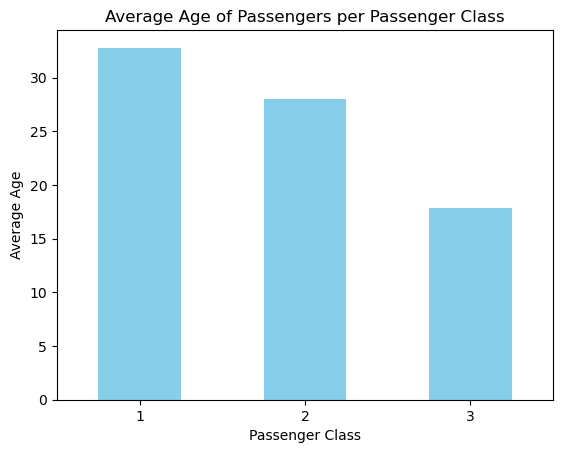

In [38]:
s.plot(kind='bar', color='skyblue')
plt.title('Average Age of Passengers per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Age')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.show()

In [40]:
df['familysize']=df['SibSp']+df['Parch']
family=df[df['familysize']>2]['Name']
print(family)


7                         Palsson, Master. Gosta Leonard
13                           Andersson, Mr. Anders Johan
16                                  Rice, Master. Eugene
24                         Palsson, Miss. Torborg Danira
25     Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...
                             ...                        
850              Andersson, Master. Sigvard Harald Elias
858                Baclini, Mrs. Solomon (Latifa Qurban)
863                    Sage, Miss. Dorothy Edith "Dolly"
885                 Rice, Mrs. William (Margaret Norton)
888             Johnston, Miss. Catherine Helen "Carrie"
Name: Name, Length: 91, dtype: object
